#### __Importing necessary libraries__

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### __1.Choose a classification dataset and normalize features.__


In [10]:
url="D:/AI ML Intern Elevate Labs Benglore/Task 6 KNN/Iris.csv"
df=pd.read_csv(url)

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
scaler=StandardScaler()

X=df.iloc[:,1:5]
y=df["Species"]

X_scaled=scaler.fit_transform(X)

### __2.Use KNeighborsClassifier from sklearn.__

In [119]:
X_train,X_test,y_train,y_test=train_test_split(
    X_scaled,y,
    test_size=0.2,             
    random_state=42
    )
knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### __3.Experiment with different values of K.__

In [87]:
from sklearn.model_selection import cross_val_score
k_values = list(range(1, 20, 2))
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X, y, cv=5).mean())
print(scores)
print(np.argmax(scores))

[0.96, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668]
3


### __4.Evaluate model using accuracy, confusion matrix.__

Accuracy: 1.00


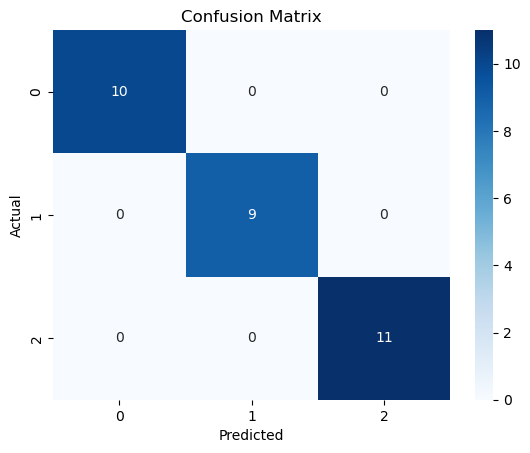

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [121]:
knn_pred=knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test,knn_pred):.2f}")

cm=confusion_matrix(y_test,knn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,knn_pred))

#### _So the model is perfect for k=3_ 

### __5.Visualize decision boundaries.__

[[1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 ...
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]
 [1.   1.02 1.04 ... 5.34 5.36 5.38]]


[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [7.84 7.84 7.84 ... 7.84 7.84 7.84]
 [7.86 7.86 7.86 ... 7.86 7.86 7.86]
 [7.88 7.88 7.88 ... 7.88 7.88 7.88]]


       SepalWidthCm  PetalLengthCm
0              1.00           0.00
1              1.02           0.00
2              1.04           0.00
3              1.06           0.00
4              1.08           0.00
...             ...            ...
86895          5.30           7.88
86896          5.32           7.88
86897          5.34           7.88
86898          5.36           7.88
86899          5.38           7.88

[86900 rows x 2 columns]


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' ... 'Iris-virginica'
 'Iris-virginica' 'Iris-virg

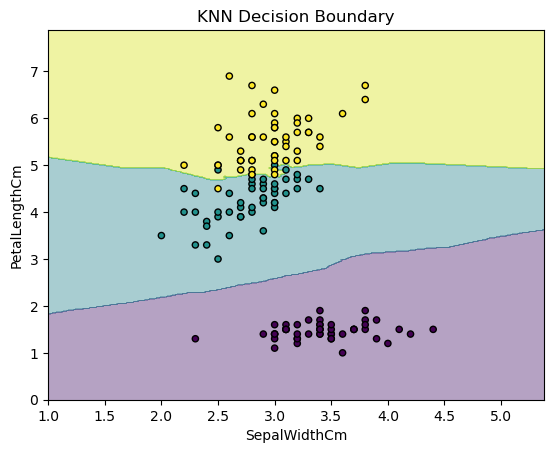

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Take first 2 features for 2D plotting
X_2d = X.iloc[:, 1:3]

# Create mesh grid for plotting decision boundary
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

print(xx)
print("\n")
print(yy)
print("\n")

# Predict on mesh grid points
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_2d.columns)
print(mesh_points)
print("\n")

Z_labels = knn.predict(mesh_points)
print(Z_labels)
print("\n")

# Map class labels to integers
class_to_int = {label: idx for idx, label in enumerate(knn.classes_)}
Z = np.array([class_to_int[label] for label in Z_labels])
print(Z)
print("\n")

Z = Z.reshape(xx.shape)
print(Z)
print("\n")

# Convert y to numeric for coloring
y_numeric = y.map(class_to_int)
print(y_numeric)
print("\n")

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot scatter with numeric colors
plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_numeric, s=20, edgecolor='k')

plt.title("KNN Decision Boundary")
plt.xlabel(X_2d.columns[0])
plt.ylabel(X_2d.columns[1])
plt.show()